<a href="https://colab.research.google.com/github/meteor0440/fin_data/blob/main/%E4%BD%9C%E6%A5%AD9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install zipline-tej

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tej_key
tej_key = 'o4sQC9B2JJWKaAKJv9Hed2gMGZQtLc'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key
os.environ['TEJAPI_BASE'] = api_base

In [3]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2021-01-04',
           end = '2023-12-31',  # 選取 2021 年年初已上市的股票
           mkt_bd_e = 'TSE',  # 上市之股票
           stktp_e = 'Common Stock',  # 普通股
           main_ind_e = 'General Industry') # general industry 篩掉金融產業
pool

Currently used TEJ API key call quota 3/1000 (0.3%)
Currently used TEJ API key data quota 640686/10000000 (6.41%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [4]:
len(pool)

889

In [5]:
pool=['2330','2454','2317','1476','2881','2882','2301','2382']

In [6]:
import TejToolAPI

start_time = pd.Timestamp('2021-01-05')
end_time = pd.Timestamp('2022-12-30')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                  end = end_time,
                  ticker = pool,
                  fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                  columns = ['主產業別_中文', '常續ROE', '營業毛利率', '營運產生現金流量', '投資產生現金流量'],
                  transfer_to_chinese = True)

data['自由現金流量'] = data['營運產生現金流量_A'] + data['投資產生現金流量_A']  # 計算自由現金流量 = 營運產生現金流量 + (-)投資產生現金流量
data.drop(columns = ['營運產生現金流量_A', '投資產生現金流量_A'], inplace = True)  # 移除欄位

data

Currently used TEJ API key call quota 10/1000 (1.0%)
Currently used TEJ API key data quota 659080/10000000 (6.59%)


,股票代碼,日期,主產業別_中文,營業毛利率_A,常續ROE_A,自由現金流量
0,1476,2021-01-05,M1400 紡織纖維,NaN,NaN,NaN
1,2301,2021-01-05,M2300 電子工業,NaN,NaN,NaN
2,2317,2021-01-05,M2300 電子工業,NaN,NaN,NaN
3,2330,2021-01-05,M2300 電子工業,NaN,NaN,NaN
4,2382,2021-01-05,M2300 電子工業,NaN,NaN,NaN
...,...,...,...,...,...,...
3907,2330,2022-12-30,M2300 電子工業,58.54,29.41,275321062.0
3908,2382,2022-12-30,M2300 電子工業,5.21,11.78,4072701.0
3909,2454,2022-12-30,M2300 電子工業,49.62,22.30,50932272.0
3910,2881,2022-12-30,M2800 金融業,53.70,10.92,125847640.0


In [7]:
# 取出最近年度(2022-12-30)的資料
data_last_1Y = data[data['日期'] == '2022-12-30'].reset_index(drop = True)

# 取出股票基本資料與 ROE 資料方便觀察
ROE_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '常續ROE_A']]

ROE_1Y_data

,股票代碼,日期,主產業別_中文,常續ROE_A
0,1476,2022-12-30,M1400 紡織纖維,26.17
1,2301,2022-12-30,M2300 電子工業,9.19
2,2317,2022-12-30,M2300 電子工業,6.54
3,2330,2022-12-30,M2300 電子工業,29.41
4,2382,2022-12-30,M2300 電子工業,11.78
5,2454,2022-12-30,M2300 電子工業,22.30
6,2881,2022-12-30,M2800 金融業,10.92
7,2882,2022-12-30,M2800 金融業,8.93


In [8]:
# 依不同產業分類，計算出產業平均 ROE
industry_ROE_ave = ROE_1Y_data.groupby('主產業別_中文')['常續ROE_A'].transform('mean')

# 加入 '產業平均ROE' 欄位
ROE_1Y_data['產業平均ROE'] = industry_ROE_ave

ROE_1Y_data

,股票代碼,日期,主產業別_中文,常續ROE_A,產業平均ROE
0,1476,2022-12-30,M1400 紡織纖維,26.17,26.170
1,2301,2022-12-30,M2300 電子工業,9.19,15.844
2,2317,2022-12-30,M2300 電子工業,6.54,15.844
3,2330,2022-12-30,M2300 電子工業,29.41,15.844
4,2382,2022-12-30,M2300 電子工業,11.78,15.844
5,2454,2022-12-30,M2300 電子工業,22.30,15.844
6,2881,2022-12-30,M2800 金融業,10.92,9.925
7,2882,2022-12-30,M2800 金融業,8.93,9.925


In [9]:
set_1 = set(ROE_1Y_data[ROE_1Y_data['常續ROE_A'] > ROE_1Y_data['產業平均ROE']]['股票代碼'])  # 篩選符合選股條件的公司
set_1

{'2330', '2454', '2881'}

## 選股條件 2：2 年平均股東權益報酬率＞17%

In [11]:
# 取出近兩年(2022-12-30, 2021-12-30)的資料
data_last_2Y = data[data['日期'].isin(['2022-12-30', '2021-12-30'])].reset_index(drop = True)

# 計算公司兩年平均的 ROE
ROE_2Y_ave = data_last_2Y.groupby('股票代碼')['常續ROE_A'].mean()

# 從 Series 轉成 Dataframe，並重新命名欄位
ROE_2Y_ave = pd.DataFrame(ROE_2Y_ave).rename(columns = {'常續ROE_A': '2年平均ROE'})

ROE_2Y_ave

,2年平均ROE
股票代碼,
1476,22.92
2301,9.74
2317,6.04
2330,25.79
2382,13.85
2454,20.16
2881,13.48
2882,11.36


In [12]:
set_2 = set(ROE_2Y_ave[ROE_2Y_ave['2年平均ROE'] > 17].index)  # 篩選符合選股條件的公司
set_2

{'1476', '2330', '2454'}

In [14]:
# 取出股票基本資料與 Gross Margin 資料方便觀察
GM_1Y_data = data_last_1Y[['股票代碼', '日期', '主產業別_中文', '營業毛利率_A']]

GM_1Y_data

,股票代碼,日期,主產業別_中文,營業毛利率_A
0,1476,2022-12-30,M1400 紡織纖維,27.93
1,2301,2022-12-30,M2300 電子工業,19.06
2,2317,2022-12-30,M2300 電子工業,6.20
3,2330,2022-12-30,M2300 電子工業,58.54
4,2382,2022-12-30,M2300 電子工業,5.21
5,2454,2022-12-30,M2300 電子工業,49.62
6,2881,2022-12-30,M2800 金融業,53.70
7,2882,2022-12-30,M2800 金融業,44.30


In [15]:
# 依不同產業分類，計算出產業平均 GM
industry_GM_ave = GM_1Y_data.groupby('主產業別_中文')['營業毛利率_A'].transform('mean')

# 加入 '產業平均毛利率' 欄位
GM_1Y_data['產業平均毛利率'] = industry_GM_ave

GM_1Y_data

,股票代碼,日期,主產業別_中文,營業毛利率_A,產業平均毛利率
0,1476,2022-12-30,M1400 紡織纖維,27.93,27.930
1,2301,2022-12-30,M2300 電子工業,19.06,27.726
2,2317,2022-12-30,M2300 電子工業,6.20,27.726
3,2330,2022-12-30,M2300 電子工業,58.54,27.726
4,2382,2022-12-30,M2300 電子工業,5.21,27.726
5,2454,2022-12-30,M2300 電子工業,49.62,27.726
6,2881,2022-12-30,M2800 金融業,53.70,49.000
7,2882,2022-12-30,M2800 金融業,44.30,49.000


In [16]:
set_3 = set(GM_1Y_data[GM_1Y_data['營業毛利率_A'] > GM_1Y_data['產業平均毛利率']]['股票代碼'])  # 篩選符合選股條件的公司
set_3

{'2330', '2454', '2881'}

In [17]:
# 取出最近一年及前一年度的資料
cash_data = data[data['日期'].isin(['2021-12-30', '2022-12-30'])].reset_index(drop = True)

# 取出股票基本資料與自由現金流量方便觀察
cash_data = cash_data[['股票代碼', '日期', '自由現金流量']]

cash_data

,股票代碼,日期,自由現金流量
0,1476,2021-12-30,1014757.0
1,2301,2021-12-30,7505958.0
2,2317,2021-12-30,-189838648.0
3,2330,2021-12-30,142938834.0
4,2382,2021-12-30,-16314566.0
5,2454,2021-12-30,2533524.0
6,2881,2021-12-30,51358068.0
7,2882,2021-12-30,33020738.0
8,1476,2022-12-30,7100373.0
9,2301,2022-12-30,-1472554.0


In [18]:
# 計算自由現金流量比率： 最近年度自由現金流量 / 前一年度自由現金流量
cash_data['自由現金流量比率'] = cash_data['自由現金流量'] / cash_data.groupby('股票代碼')['自由現金流量'].shift(1)

# 計算'指標'： 自由現金流量比率 - 1
cash_data['指標'] = cash_data['自由現金流量比率'] - 1

cash_data

,股票代碼,日期,自由現金流量,自由現金流量比率,指標
0,1476,2021-12-30,1014757.0,NaN,NaN
1,2301,2021-12-30,7505958.0,NaN,NaN
2,2317,2021-12-30,-189838648.0,NaN,NaN
3,2330,2021-12-30,142938834.0,NaN,NaN
4,2382,2021-12-30,-16314566.0,NaN,NaN
5,2454,2021-12-30,2533524.0,NaN,NaN
6,2881,2021-12-30,51358068.0,NaN,NaN
7,2882,2021-12-30,33020738.0,NaN,NaN
8,1476,2022-12-30,7100373.0,6.997117,5.997117
9,2301,2022-12-30,-1472554.0,-0.196185,-1.196185


In [19]:
set_4 = set(cash_data[cash_data['指標'] > 1.5]['股票代碼'])  # 篩選符合選股條件的公司
set_4

{'1476', '2454'}

In [20]:
tickers = list(set_1 & set_2 & set_3 & set_4)
tickers

['2454']

In [22]:
import tejapi

tejapi.ApiConfig.api_key = tej_key
tejapi.ApiConfig.ignoretz = api_base

ticker_data = tejapi.get('TWN/APISTOCK',  # 證券屬性資料表
              coid = tickers,
              opts = {'columns':['coid', 'stk_name', 'main_ind_c']},
              chinese_column_name = True,
              paginate = True)

ticker_data

,公司簡稱,證券名稱,主產業別(中)
None,,,
0,2454,聯發科,M2300 電子工業


In [23]:
company_list = data['股票代碼'].unique().tolist()
coid = {'公司代碼': company_list}

data_combine = pd.DataFrame(coid)
data_combine['選股條件 1'] = data_combine['公司代碼'].isin(set_1)
data_combine['選股條件 2'] = data_combine['公司代碼'].isin(set_2)
data_combine['選股條件 3'] = data_combine['公司代碼'].isin(set_3)
data_combine['選股條件 4'] = data_combine['公司代碼'].isin(set_4)
data_combine['符合條件數量'] = data_combine.iloc[:, 1:5].sum(axis = 1)

data_combine

,公司代碼,選股條件 1,選股條件 2,選股條件 3,選股條件 4,符合條件數量
0,1476,False,True,False,True,2
1,2301,False,False,False,False,0
2,2317,False,False,False,False,0
3,2330,True,True,True,False,3
4,2382,False,False,False,False,0
5,2454,True,True,True,True,4
6,2881,True,False,True,False,2
7,2882,False,False,False,False,0


In [24]:
start = '2023-01-01'
end = '2023-12-31'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

[2025-06-03 09:41:19.897598] INFO: zipline.data.bundles.core: Ingesting tquant.
Merging daily equity files:  [####################################]   
Currently used TEJ API key call quota 17/1000 (1.7%)
Currently used TEJ API key data quota 661250/10000000 (6.61%)
[2025-06-03 09:41:24.387193] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [25]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
  context.day = 0
  context.tickers = tickers
  set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
  set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
  set_benchmark(symbol('IR0001'))

In [26]:
def handle_data(context, data):

  # 回測第一天買進
  if context.day == 0:
    for ticker in context.tickers:
      order_percent(symbol(ticker), 1 / len(tickers))

  context.day += 1  # 以免重複買進

In [27]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
!wget -O MicrosoftJhengHei.ttf https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
!wget -O ArialUnicodeMS.ttf https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF

fm.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='Microsoft Jheng Hei')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='Arial Unicode MS')



capital_base = 1e7  # 設定初始資金

def analyze(context, results):

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
  results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
  ax1.set_ylabel('Portfolio value (TWD)')

  plt.legend(loc = 'upper left')

  plt.gcf().set_size_inches(18, 8)
  plt.grid()
  plt.show()

--2025-06-03 09:42:37--  https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf [following]
--2025-06-03 09:42:37--  https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M   135MB/s    in 0.2s    

2025-06-03 09:42:38 (135 MB/s) - ‘MicrosoftJhengHei.ttf’ saved [21663376/21663376]



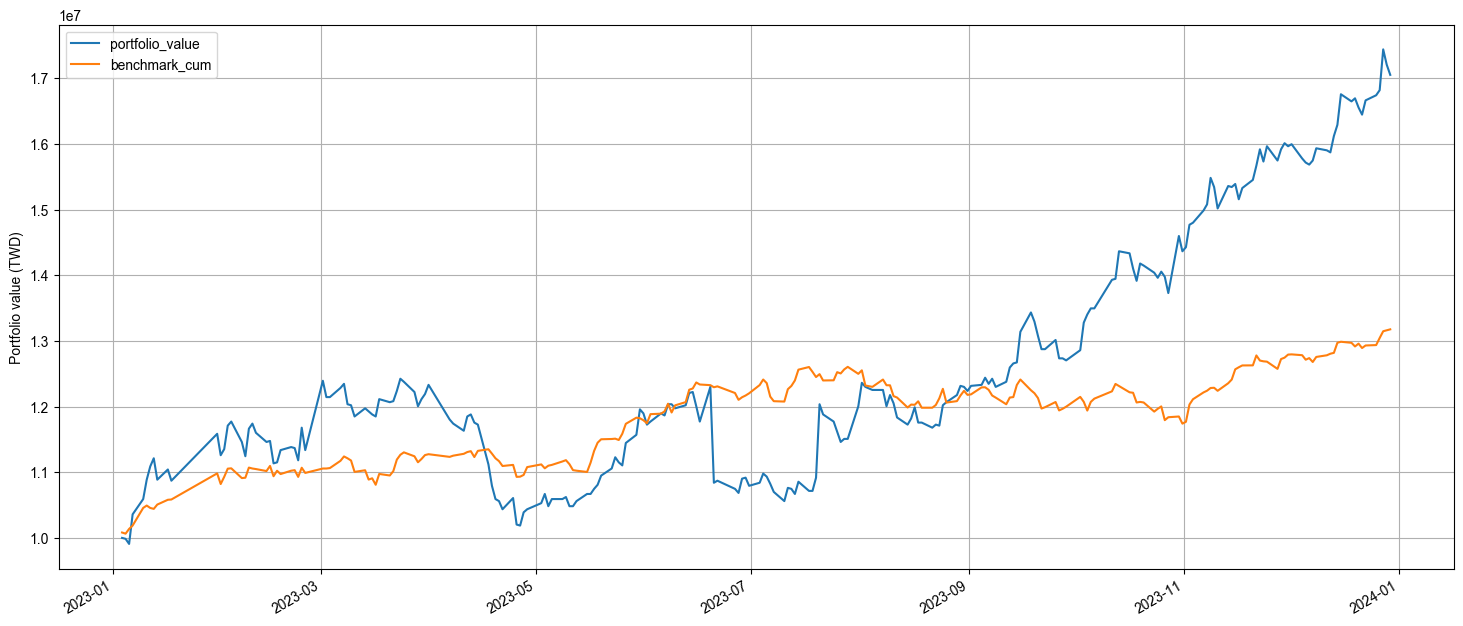

,period_open,period_close,portfolio_value,ending_cash,transactions,positions,capital_used,longs_count,treasury_return,returns,...,algorithm_period_return,trading_days,sharpe,algo_volatility,benchmark_period_return,excess_return,benchmark_volatility,max_leverage,max_drawdown,benchmark_cum
2023-01-03 13:30:00+08:00,2023-01-03 09:01:00+08:00,2023-01-03 13:30:00+08:00,1.000000e+07,1.000000e+07,[],[],0.000000e+00,0,0.0,0.000000,...,0.000000,1,NaN,NaN,0.008220,-0.008220,NaN,0.000000,0.000000,1.008220e+07
2023-01-04 13:30:00+08:00,2023-01-04 09:01:00+08:00,2023-01-04 13:30:00+08:00,9.985902e+06,1.107299e+05,"[{'amount': 15527, 'dt': 2023-01-04 13:30:00+0...","[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",-9.889270e+06,1,0.0,-0.001410,...,-0.001410,2,-11.224972,0.015825,0.006464,-0.007874,0.111808,0.988911,-0.001410,1.006464e+07
2023-01-05 13:30:00+08:00,2023-01-05 09:01:00+08:00,2023-01-05 13:30:00+08:00,9.908267e+06,1.107299e+05,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,-0.007774,...,-0.009173,3,-11.733028,0.065753,0.013689,-0.022862,0.086911,0.988911,-0.009173,1.013689e+07
2023-01-06 13:30:00+08:00,2023-01-06 09:01:00+08:00,2023-01-06 13:30:00+08:00,1.035855e+07,1.107299e+05,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,0.045445,...,0.035855,4,5.876603,0.388734,0.018812,0.017043,0.071075,0.989310,-0.009173,1.018812e+07
2023-01-09 13:30:00+08:00,2023-01-09 09:01:00+08:00,2023-01-09 13:30:00+08:00,1.059145e+07,1.107299e+05,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,0.022484,...,0.059145,5,8.462374,0.349873,0.045668,0.013478,0.165776,0.989545,-0.009173,1.045668e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 13:30:00+08:00,2023-12-25 09:01:00+08:00,2023-12-25 13:30:00+08:00,1.674025e+07,1.290884e+06,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,0.004659,...,0.674025,235,1.872575,0.323039,0.293622,0.380403,0.126056,0.991087,-0.179970,1.293622e+07
2023-12-26 13:30:00+08:00,2023-12-26 09:01:00+08:00,2023-12-26 13:30:00+08:00,1.681788e+07,1.290884e+06,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,0.004638,...,0.681788,236,1.883934,0.322359,0.304421,0.377368,0.126009,0.991087,-0.179970,1.304421e+07
2023-12-27 13:30:00+08:00,2023-12-27 09:01:00+08:00,2023-12-27 13:30:00+08:00,1.743896e+07,1.290884e+06,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,0.036930,...,0.743896,237,1.989896,0.323639,0.314692,0.429205,0.125932,0.991087,-0.179970,1.314692e+07
2023-12-28 13:30:00+08:00,2023-12-28 09:01:00+08:00,2023-12-28 13:30:00+08:00,1.720606e+07,1.290884e+06,[],"[{'sid': Equity(0 [2454]), 'amount': 15527, 'c...",0.000000e+00,1,0.0,-0.013355,...,0.720606,238,1.939452,0.323370,0.316078,0.404528,0.125666,0.991087,-0.179970,1.316078e+07


In [28]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results

<Axes: >

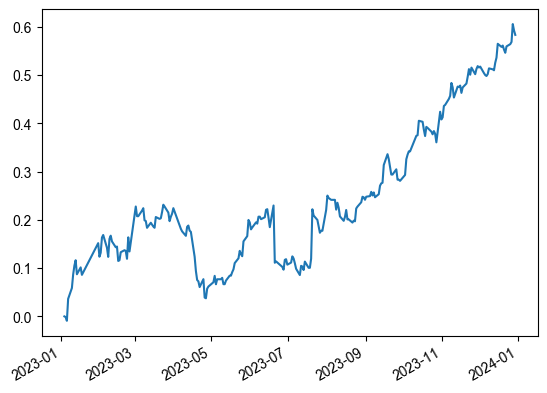

In [29]:
results.returns.cumsum().plot()  # 繪製累積回報圖

In [30]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

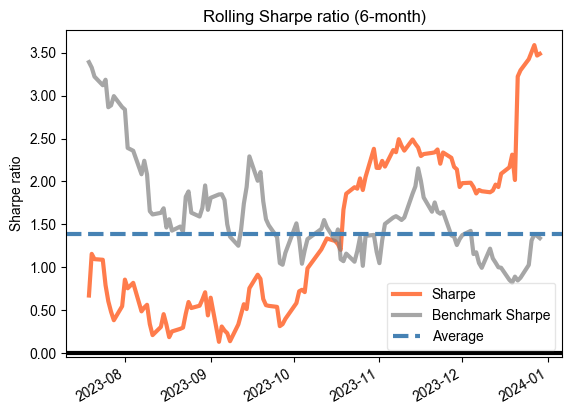

In [31]:
# 繪製夏普比率圖

from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
          factor_returns=benchmark_rets)

Start date,2023-01-03
End date,2023-12-29
Total months,11
,Backtest
Annual return,75.529%
Cumulative returns,70.508%
Annual volatility,32.291%
Sharpe ratio,1.90
Calmar ratio,4.20
Stability,0.66
Max drawdown,-17.997%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.00,2023-03-23,2023-04-26,2023-09-05,112
1,5.43,2023-09-18,2023-09-28,2023-10-05,13
2,5.41,2023-02-03,2023-02-15,2023-03-01,17
3,4.43,2023-10-13,2023-10-27,2023-10-30,12
4,4.39,2023-03-01,2023-03-10,2023-03-23,17


Top 10 long positions of all time,max
sid,
2454,99.11%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2454,99.11%


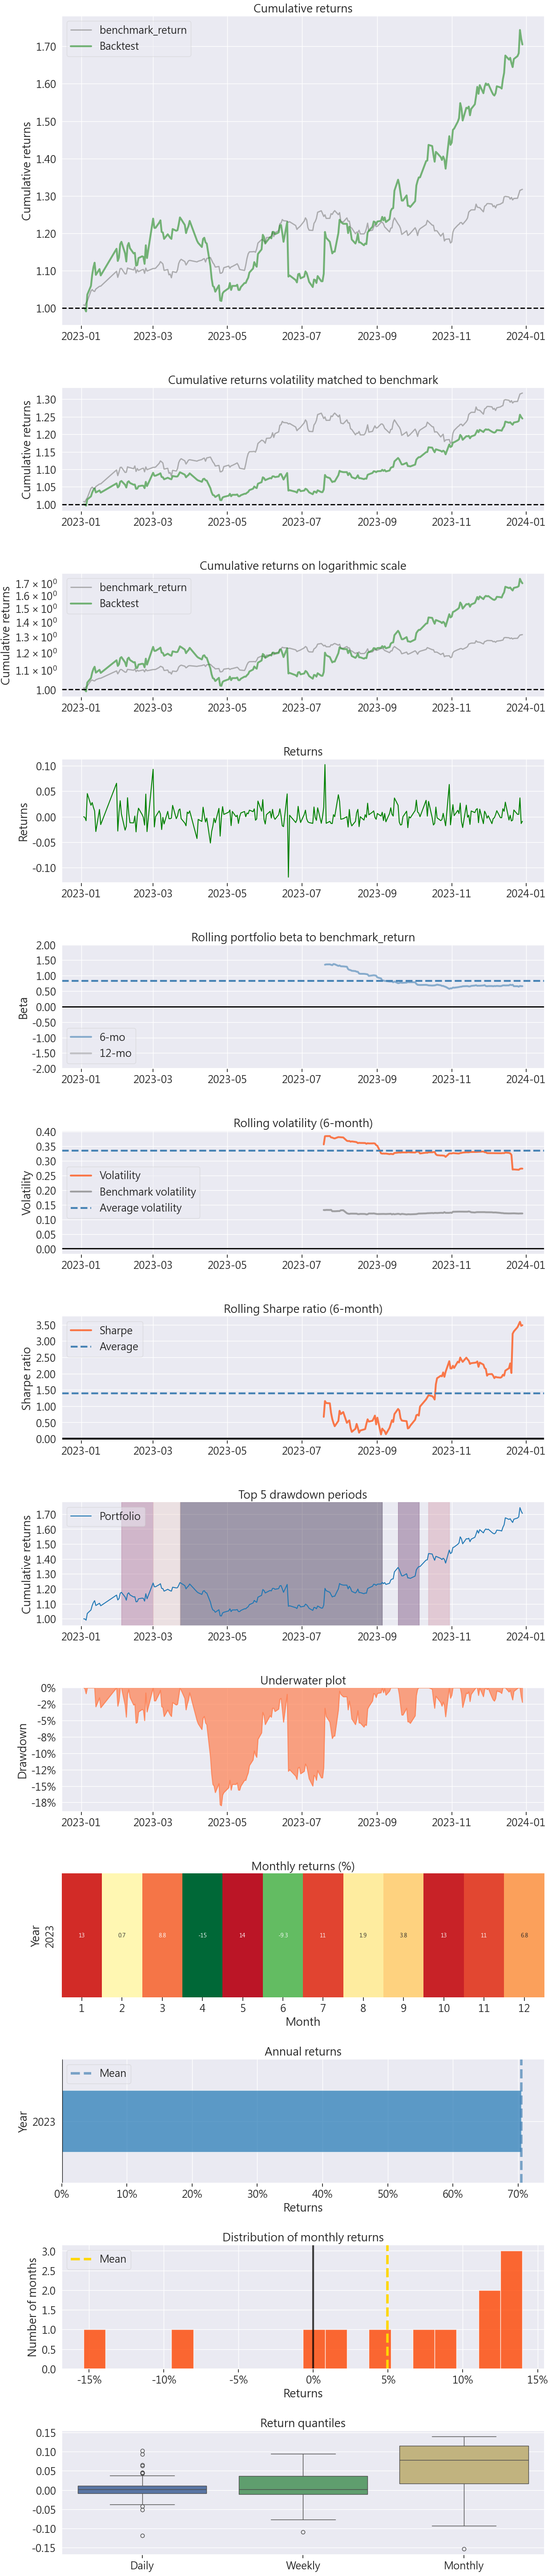

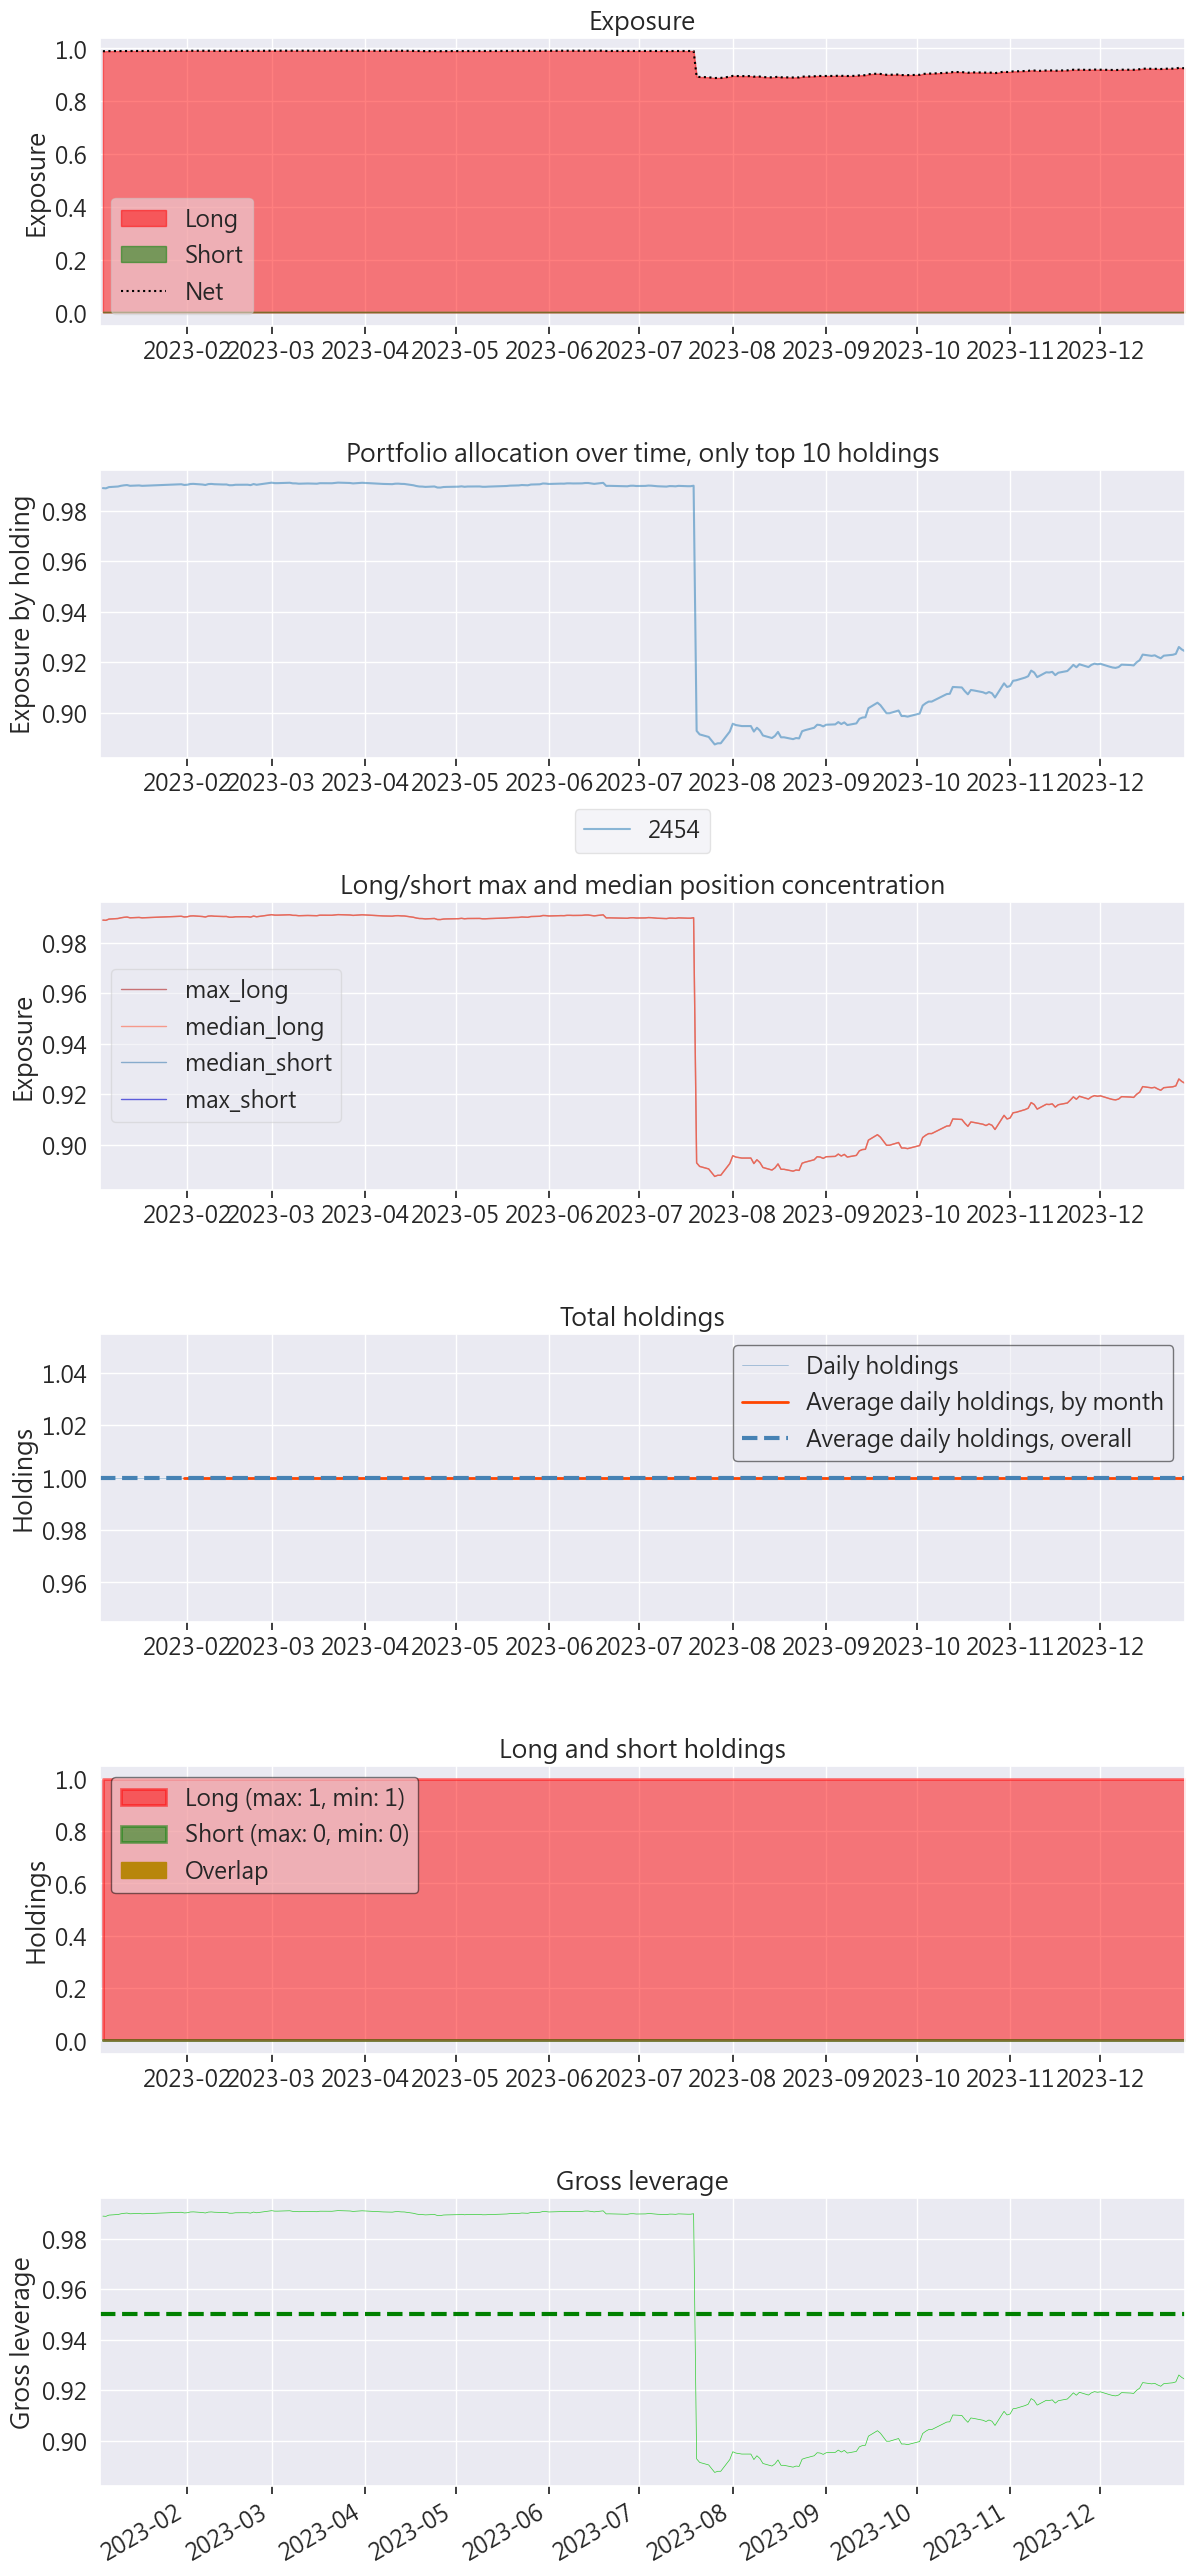

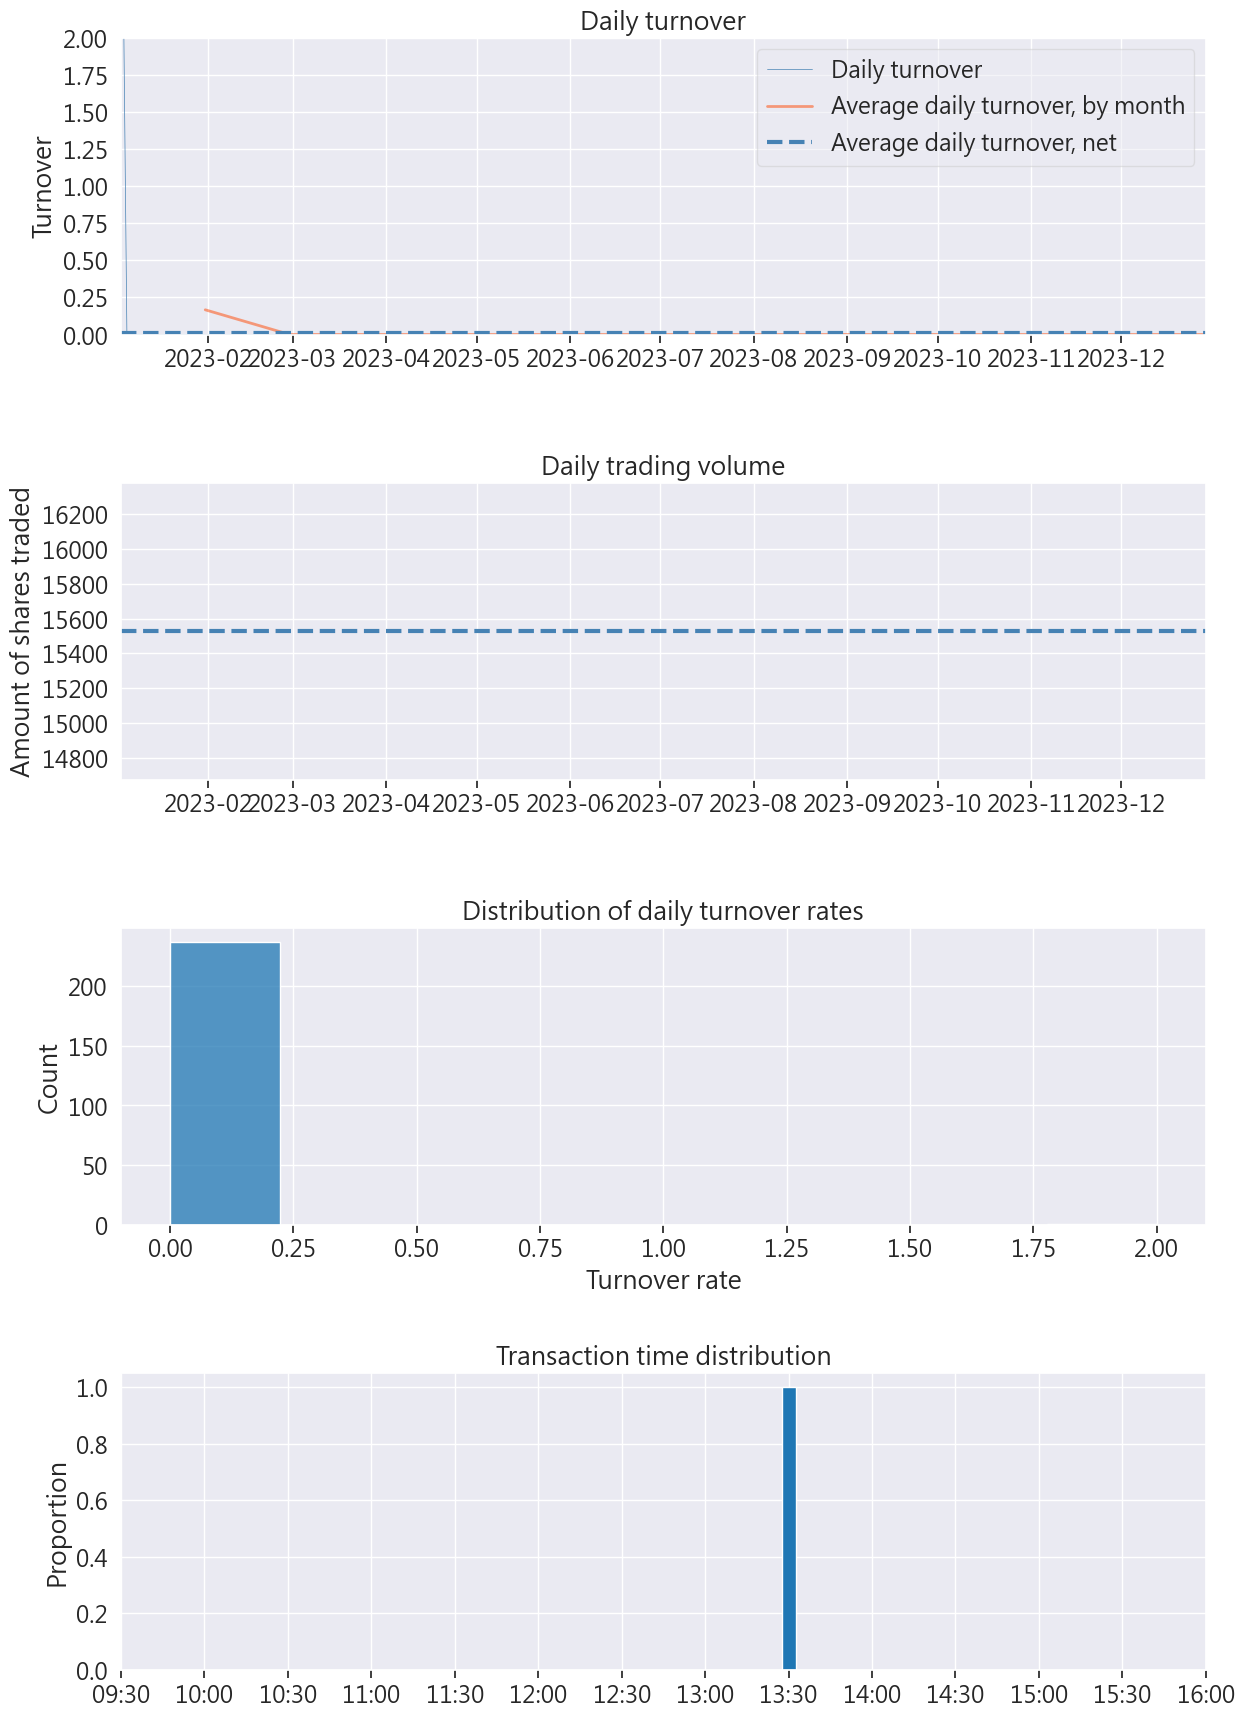

In [32]:
# 繪製 Pyfolio 中提供的所有圖表

pyfolio.tears.create_full_tear_sheet(returns=returns,
                  positions=positions,
                  transactions=transactions,
                  benchmark_rets=benchmark_rets
                  )

In [33]:
# 取出 results 中的 positions, transactions & orders 資料表
positions, transactions, orders = get_transaction_detail(results)

In [34]:
positions

,sid,symbol,asset,amount,cost_basis,last_sale_price
2023-01-04 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,636.0
2023-01-05 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,631.0
2023-01-06 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,660.0
2023-01-09 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,675.0
2023-01-10 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,694.0
...,...,...,...,...,...,...
2023-12-25 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,995.0
2023-12-26 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,1000.0
2023-12-27 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,1040.0
2023-12-28 00:00:00+00:00,0,2454,Equity(0 [2454]),15527,636.907972,1025.0


In [35]:
transactions

,sid,symbol,amount,dt,price,order_id,asset,commission
2023-01-04 00:00:00+00:00,0,2454,15527,2023-01-04 13:30:00+08:00,636.001615,8ece007bd6804314851fb48420da512e,Equity(0 [2454]),None


In [36]:
orders

,sid,symbol,id,dt,reason,created,amount,filled,commission,stop,limit,stop_reached,limit_reached,asset,status
2023-01-03 00:00:00+00:00,0,2454,8ece007bd6804314851fb48420da512e,2023-01-03 13:30:00+08:00,None,2023-01-03 13:30:00+08:00,15527,0,0,None,None,False,False,Equity(0 [2454]),0
2023-01-04 00:00:00+00:00,0,2454,8ece007bd6804314851fb48420da512e,2023-01-04 13:30:00+08:00,None,2023-01-03 13:30:00+08:00,15527,15527,14073,None,None,False,False,Equity(0 [2454]),1


In [37]:
orders[orders['symbol'] == '3557']

,sid,symbol,id,dt,reason,created,amount,filled,commission,stop,limit,stop_reached,limit_reached,asset,status


In [38]:
orders.loc['2023-01-03']

,2023-01-03 00:00:00+00:00
sid,0
symbol,2454
id,8ece007bd6804314851fb48420da512e
dt,2023-01-03 13:30:00+08:00
reason,None
created,2023-01-03 13:30:00+08:00
amount,15527
filled,0
commission,0
stop,None


In [39]:
tickers = ['2330','2317','2454']
start = '2023-01-01'
end = '2023-12-31'
# IR0001 為加權股價報酬指數，通常用來當作回測 benchmark。
os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

[2025-06-03 09:45:21.935325] INFO: zipline.data.bundles.core: Ingesting tquant.
Merging daily equity files:  [####################################]   
Currently used TEJ API key call quota 23/1000 (2.3%)
Currently used TEJ API key data quota 664384/10000000 (6.64%)
[2025-06-03 09:45:26.733357] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipline.api import *
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail
from zipline.api import *
from zipline.finance import commission, slippage

# tej_key
tej_key = 'AS9qRIEHRL2JaBWYq7WJtP9PulIhTO'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key
os.environ['TEJAPI_BASE'] = api_base

二、演算法編輯

In [41]:
def initialize(context):
  context.day = 0
  context.tickers = symbol('2330')
  set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
  set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
  set_benchmark(symbol('IR0001'))

  # 設定賣賣的開關
  context.can_buy = True
  # 設定買賣日期區間，需要小於6月之前，因為要持倉180日
  context.tradetime = pd.date_range(start='2023-06-25', end='2023-06-30', freq='D', tz='UTC')

def handle_data(context, data):

  today = pd.Timestamp(data.current_session.date(),tz='utc')

  # 買進條件設定
  if context.can_buy and (today in context.tradetime):
    print(today)
    order(context.tickers, 1000)
    context.can_buy=False
  # 持有日期計算
  if context.portfolio.positions[symbol('2330')].amount>0:
    context.day += 1  # 以免重複買進

  # 賣出條件設定
  if context.day>180:
    order_target(context.tickers , 0)



# 設定模擬日期
start = '2023-01-01'
end = '2023-12-31'
start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

# 設定初始本金
capital_base = 1000000

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    #analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results

2023-06-26 00:00:00+00:00


,period_open,period_close,transactions,treasury_return,starting_value,long_exposure,ending_cash,benchmark_return,short_value,portfolio_value,...,benchmark_volatility,sharpe,algorithm_period_return,alpha,beta,algo_volatility,max_leverage,sortino,max_drawdown,trading_days
2023-01-03 13:30:00+08:00,2023-01-03 09:01:00+08:00,2023-01-03 13:30:00+08:00,[],0.0,0.0,0.0,1000000.000000,0.008220,0.0,1.000000e+06,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,1
2023-01-04 13:30:00+08:00,2023-01-04 09:01:00+08:00,2023-01-04 13:30:00+08:00,[],0.0,0.0,0.0,1000000.000000,-0.001741,0.0,1.000000e+06,...,0.111808,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,2
2023-01-05 13:30:00+08:00,2023-01-05 09:01:00+08:00,2023-01-05 13:30:00+08:00,[],0.0,0.0,0.0,1000000.000000,0.007178,0.0,1.000000e+06,...,0.086911,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,3
2023-01-06 13:30:00+08:00,2023-01-06 09:01:00+08:00,2023-01-06 13:30:00+08:00,[],0.0,0.0,0.0,1000000.000000,0.005055,0.0,1.000000e+06,...,0.071075,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,4
2023-01-09 13:30:00+08:00,2023-01-09 09:01:00+08:00,2023-01-09 13:30:00+08:00,[],0.0,0.0,0.0,1000000.000000,0.026360,0.0,1.000000e+06,...,0.165776,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 13:30:00+08:00,2023-12-25 09:01:00+08:00,2023-12-25 13:30:00+08:00,[],0.0,582000.0,581000.0,430183.999886,0.000466,0.0,1.011184e+06,...,0.126056,0.192817,0.011184,-0.084272,0.362271,0.077299,0.580445,0.269083,-0.070714,235
2023-12-26 13:30:00+08:00,2023-12-26 09:01:00+08:00,2023-12-26 13:30:00+08:00,[],0.0,581000.0,586000.0,430183.999886,0.008348,0.0,1.016184e+06,...,0.126009,0.260304,0.016184,-0.082344,0.363373,0.077300,0.580445,0.364037,-0.070714,236
2023-12-27 13:30:00+08:00,2023-12-27 09:01:00+08:00,2023-12-27 13:30:00+08:00,[],0.0,586000.0,592000.0,430183.999886,0.007874,0.0,1.022184e+06,...,0.125932,0.340118,0.022184,-0.079455,0.364897,0.077369,0.580445,0.477093,-0.070714,237
2023-12-28 13:30:00+08:00,2023-12-28 09:01:00+08:00,2023-12-28 13:30:00+08:00,[],0.0,592000.0,593000.0,430183.999886,0.001055,0.0,1.023184e+06,...,0.125666,0.352798,0.023184,-0.078553,0.364888,0.077211,0.580445,0.494909,-0.070714,238


三、運用pyfolio分析績效

--2025-06-03 09:46:02--  https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf [following]
--2025-06-03 09:46:02--  https://raw.githubusercontent.com/a7532ariel/ms-web/master/Microsoft-JhengHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M   130MB/s    in 0.2s    

2025-06-03 09:46:02 (130 MB/s) - ‘MicrosoftJhengHei.ttf’ saved [21663376/21663376]



Start date,2023-01-03
End date,2023-12-29
Total months,11
,Backtest
Annual return,2.446%
Cumulative returns,2.318%
Annual volatility,7.705%
Sharpe ratio,0.35
Calmar ratio,0.35
Stability,0.07
Max drawdown,-7.071%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.07,2023-07-17,2023-09-26,2023-12-27,114
1,1.98,2023-07-04,2023-07-06,2023-07-13,8
2,0.10,2023-06-28,2023-06-29,2023-06-30,3
3,0.08,2023-06-26,2023-06-27,2023-06-28,3
4,NaN,NaT,NaT,NaT,NaN


Top 10 long positions of all time,max
sid,
2330,58.04%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2330,58.04%


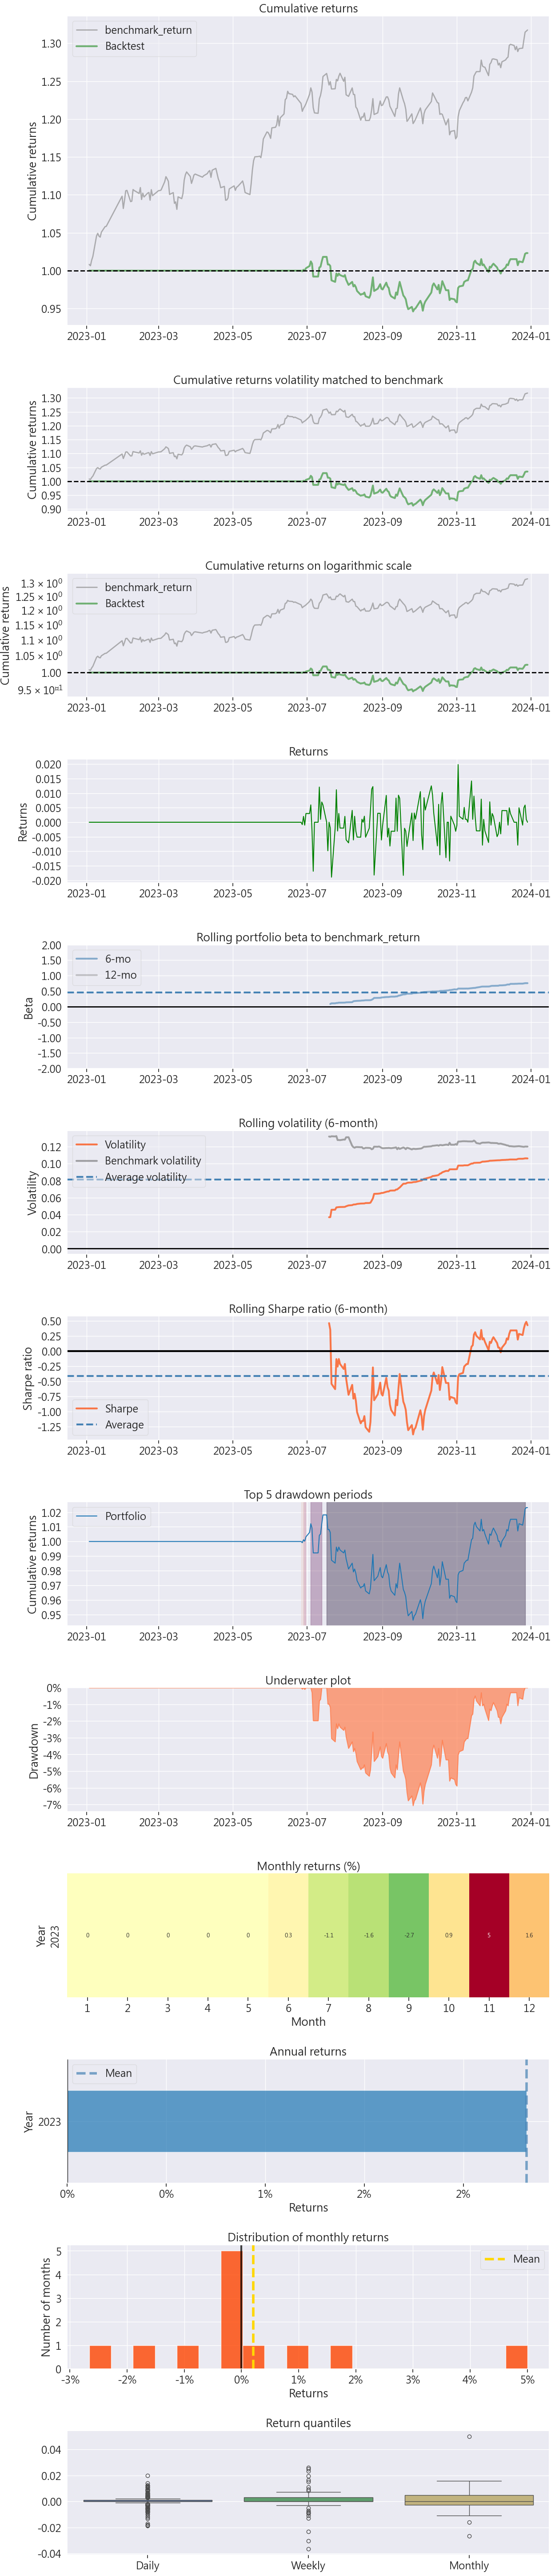

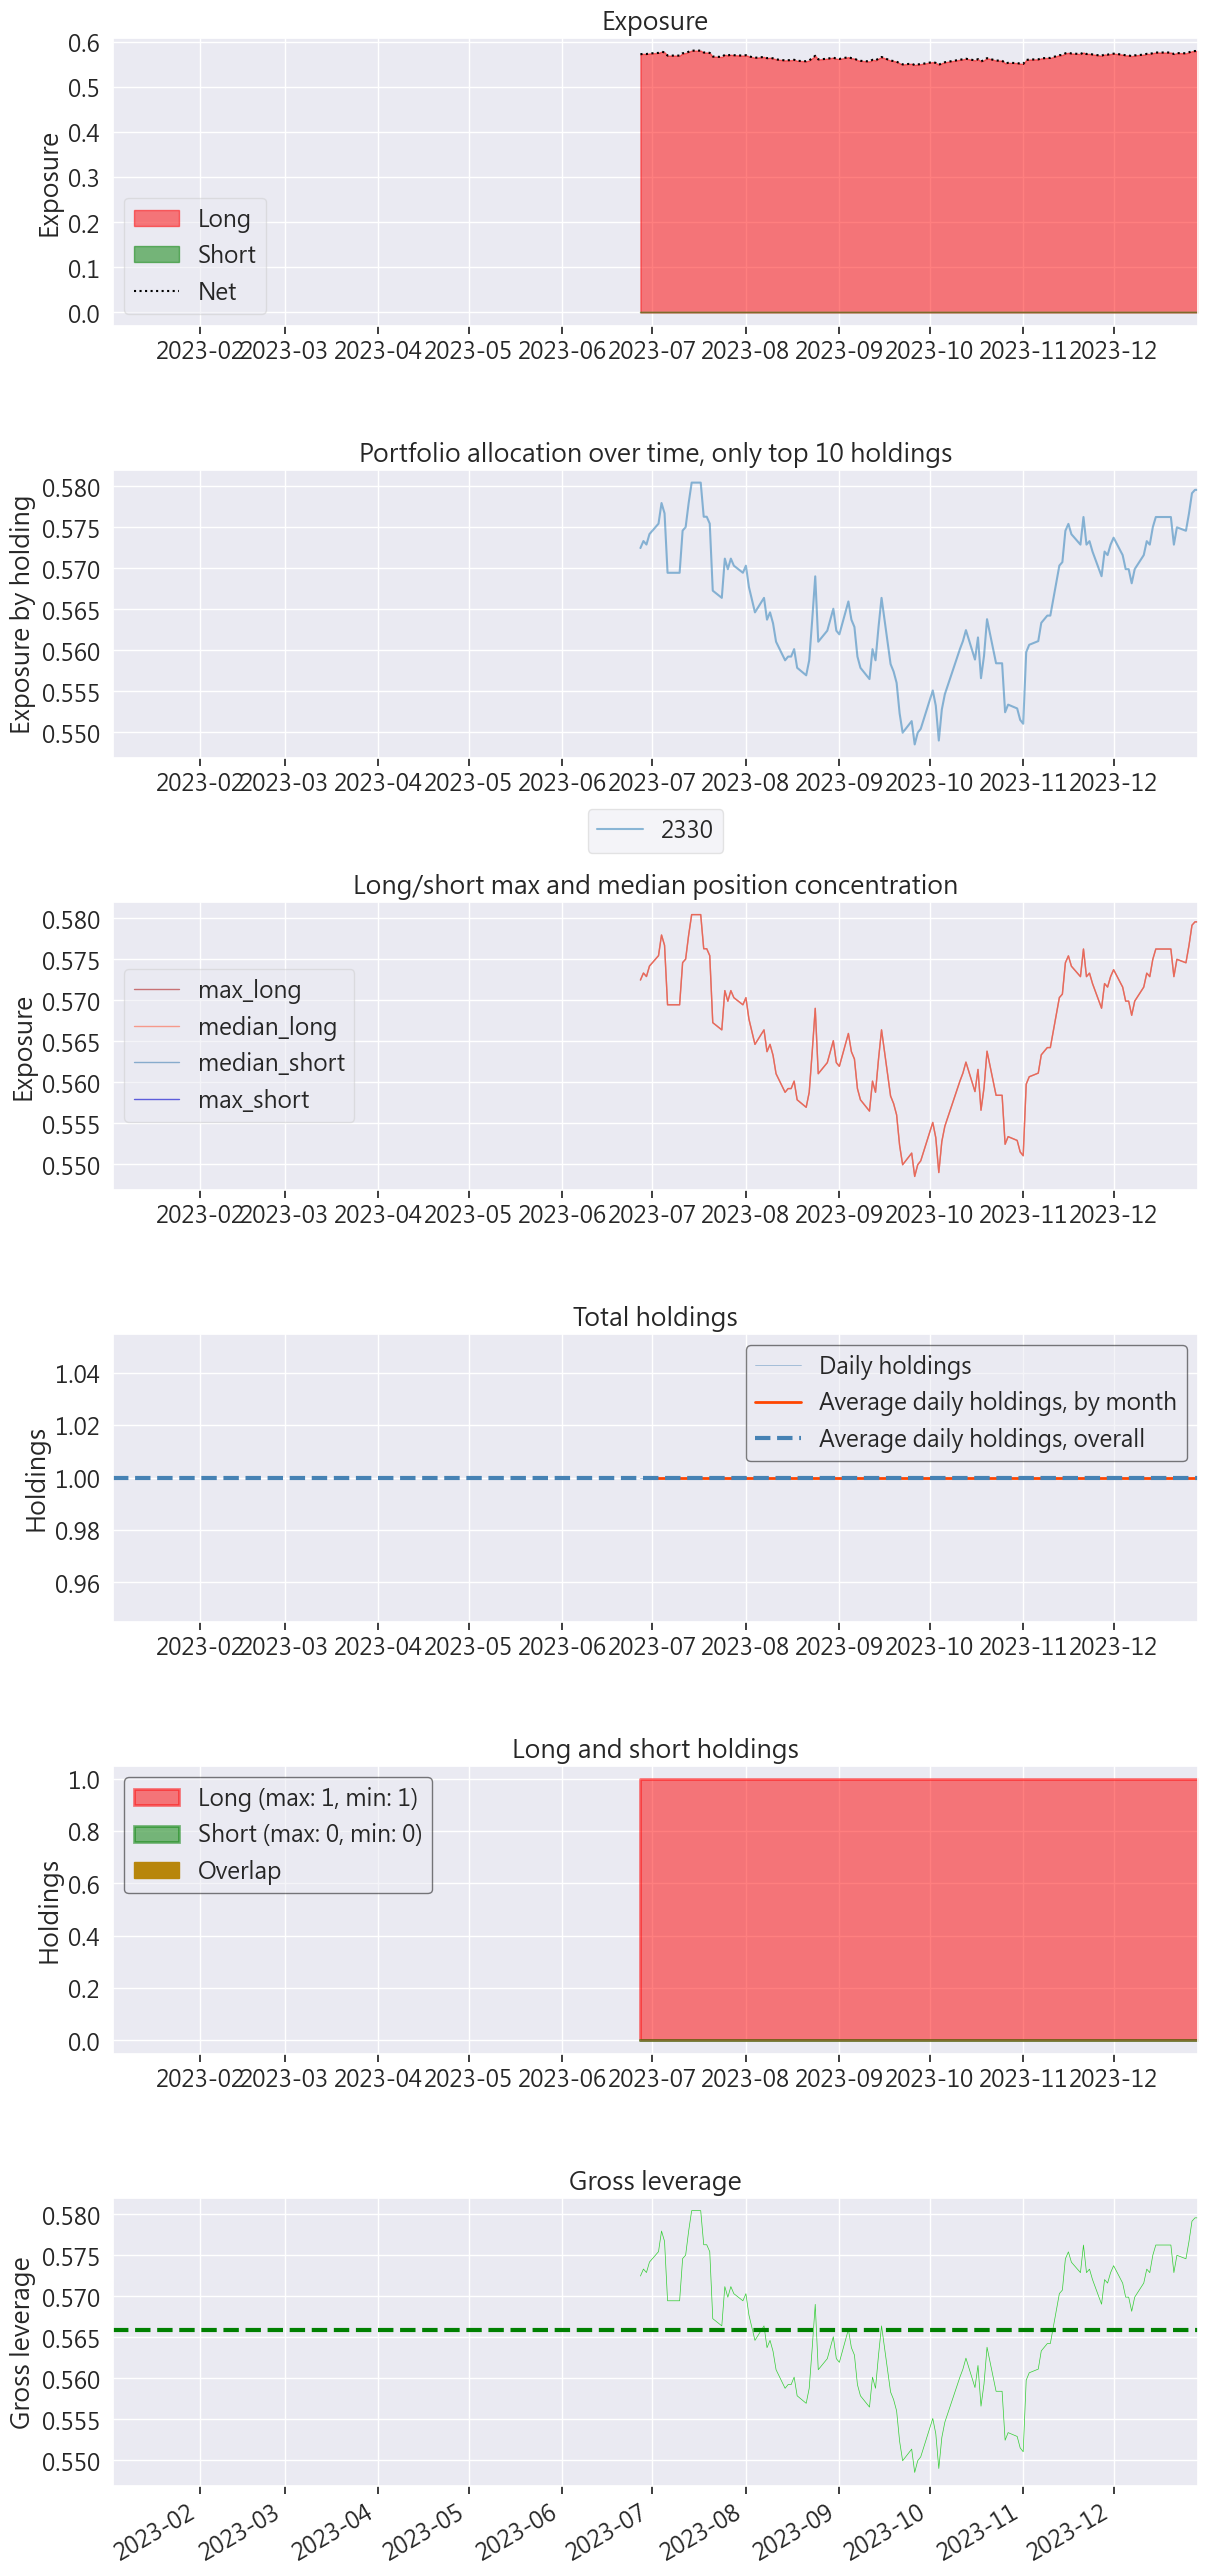

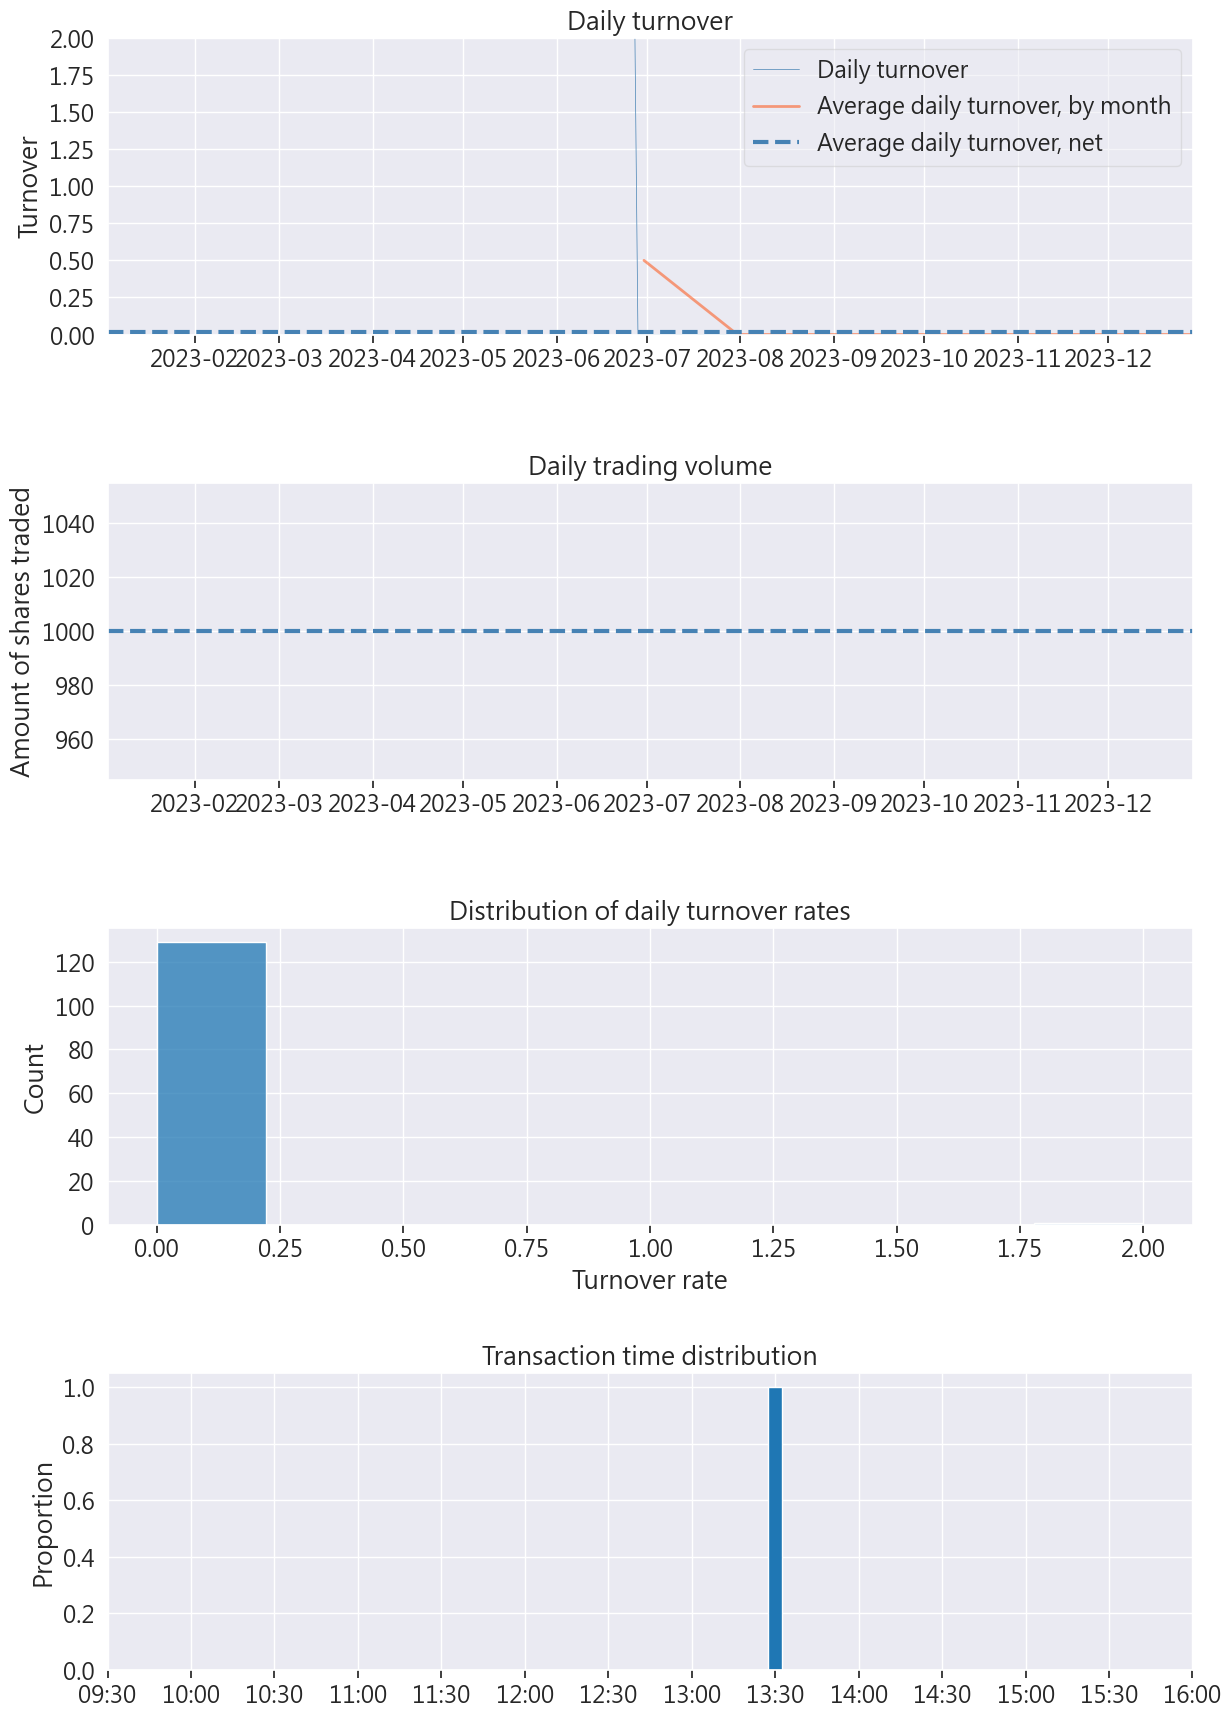

In [42]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
!wget -O MicrosoftJhengHei.ttf https://github.com/a7532ariel/ms-web/raw/master/Microsoft-JhengHei.ttf
!wget -O ArialUnicodeMS.ttf https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF

fm.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='Microsoft Jheng Hei')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='Arial Unicode MS')

from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

# 繪製 Pyfolio 中提供的所有圖表

pyfolio.tears.create_full_tear_sheet(returns=returns,
                  positions=positions,
                  transactions=transactions,
                  benchmark_rets=benchmark_rets
                  )